In [706]:
import numpy as np
import pandas as pd

In [707]:
##Importação dos dados de treino

In [708]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [709]:
##Remoção de colunas inteiramente preenchidas por NaN

In [710]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [711]:
##Introdução do cabeçalho do data frame

In [712]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [713]:
##Geração de Histogramas e seleção de variáveis

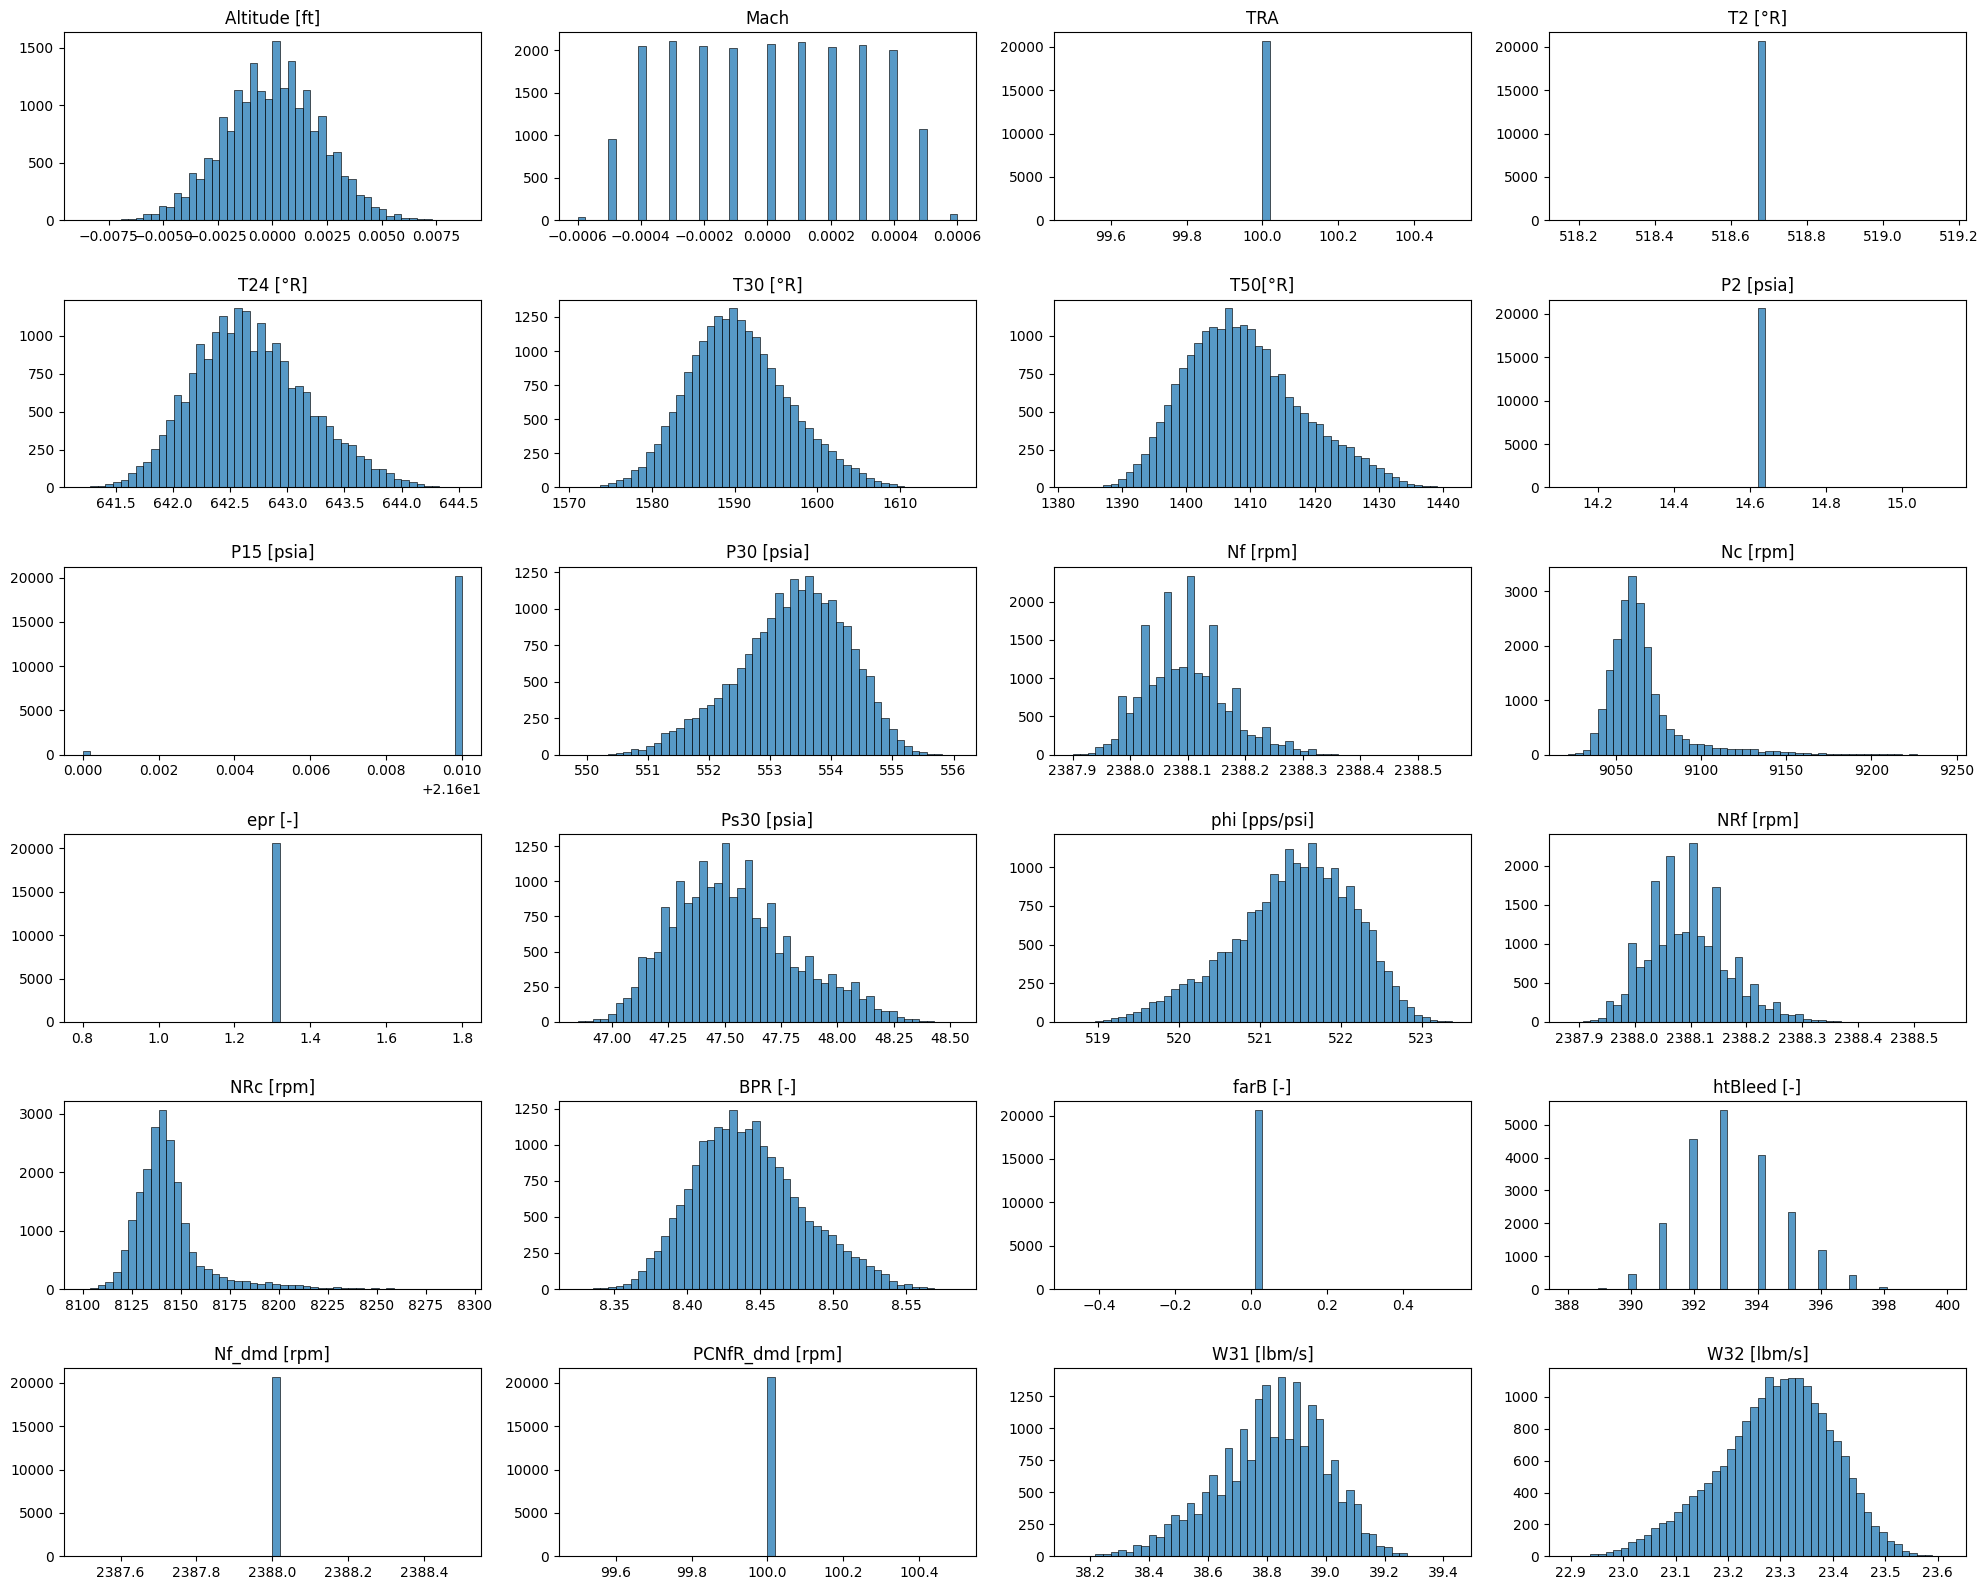

In [714]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [715]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [716]:
##Normalização

In [717]:
from sklearn.preprocessing import MinMaxScaler

In [718]:
features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [719]:
##Definição dos targets para regressão e classificação nos dados de treino

In [720]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [721]:
##Visualização de um ciclo de vida de um motor

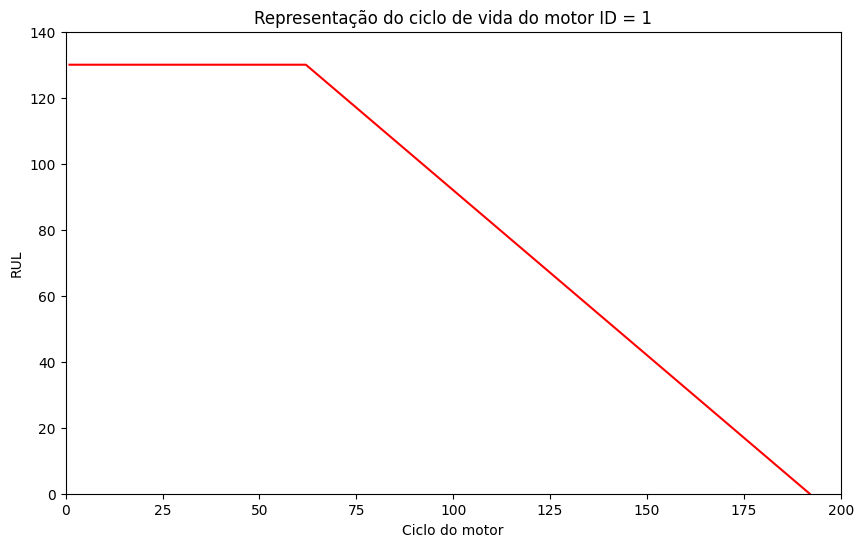

In [722]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [723]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [724]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [725]:
##Criação das janelas de tempo para dados de treino e de teste

In [726]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [727]:
##Separação das variáveis de treino e teste

In [728]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [729]:
##Criação do modelo LSTM

In [730]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape = (x1.shape[1], x1.shape[2])

model_lstm=Sequential()
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True,input_shape=shape))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(256,activation='tanh'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='linear'))

model_lstm.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [731]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 4171.5112 - mean_absolute_error: 53.4160 - mean_squared_error: 4171.5112

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - loss: 2488.0442 - mean_absolute_error: 41.1640 - mean_squared_error: 2488.0442 - val_loss: 825.5554 - val_mean_absolute_error: 24.4816 - val_mean_squared_error: 825.5554
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 920.8132 - mean_absolute_error: 24.7204 - mean_squared_error: 920.8132

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - loss: 837.4139 - mean_absolute_error: 23.2098 - mean_squared_error: 837.4139 - val_loss: 443.6626 - val_mean_absolute_error: 17.2539 - val_mean_squared_error: 443.6626
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 647.4638 - mean_absolute_error: 19.7971 - mean_squared_error: 647.4638

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - loss: 636.8395 - mean_absolute_error: 19.6179 - mean_squared_error: 636.8395 - val_loss: 451.4373 - val_mean_absolute_error: 17.6578 - val_mean_squared_error: 451.4373
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 523.5624 - mean_absolute_error: 17.9529 - mean_squared_error: 523.5624

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 526.7307 - mean_absolute_error: 17.8782 - mean_squared_error: 526.7307 - val_loss: 339.7059 - val_mean_absolute_error: 14.9293 - val_mean_squared_error: 339.7059
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 445.1823 - mean_absolute_error: 16.4327 - mean_squared_error: 445.1823

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 460.7584 - mean_absolute_error: 16.5952 - mean_squared_error: 460.7584 - val_loss: 498.8512 - val_mean_absolute_error: 17.7214 - val_mean_squared_error: 498.8512
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 421.7444 - mean_absolute_error: 15.8543 - mean_squared_error: 421.7444

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 424.6120 - mean_absolute_error: 15.8780 - mean_squared_error: 424.6119 - val_loss: 299.7791 - val_mean_absolute_error: 13.9722 - val_mean_squared_error: 299.7791
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 379.1674 - mean_absolute_error: 15.0072 - mean_squared_error: 379.1674

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 391.7472 - mean_absolute_error: 15.1752 - mean_squared_error: 391.7472 - val_loss: 327.3875 - val_mean_absolute_error: 14.0492 - val_mean_squared_error: 327.3875
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 378.9668 - mean_absolute_error: 15.0067 - mean_squared_error: 378.9668

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 370.8686 - mean_absolute_error: 14.7891 - mean_squared_error: 370.8686 - val_loss: 461.9525 - val_mean_absolute_error: 16.7533 - val_mean_squared_error: 461.9525
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 407.7815 - mean_absolute_error: 15.4246 - mean_squared_error: 407.7815

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 365.9272 - mean_absolute_error: 14.6420 - mean_squared_error: 365.9272 - val_loss: 388.6599 - val_mean_absolute_error: 15.1715 - val_mean_squared_error: 388.6599
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 372.1057 - mean_absolute_error: 14.6568 - mean_squared_error: 372.1057

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 353.8490 - mean_absolute_error: 14.3083 - mean_squared_error: 353.8490 - val_loss: 327.8895 - val_mean_absolute_error: 13.9961 - val_mean_squared_error: 327.8895
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 358.2252 - mean_absolute_error: 14.3517 - mean_squared_error: 358.2252

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 340.8633 - mean_absolute_error: 14.0203 - mean_squared_error: 340.8633 - val_loss: 279.8383 - val_mean_absolute_error: 12.8848 - val_mean_squared_error: 279.8383
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 332.6563 - mean_absolute_error: 13.8057 - mean_squared_error: 332.6563

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 326.9096 - mean_absolute_error: 13.7148 - mean_squared_error: 326.9096 - val_loss: 359.2992 - val_mean_absolute_error: 14.5714 - val_mean_squared_error: 359.2992
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 320.9478 - mean_absolute_error: 13.5516 - mean_squared_error: 320.9478

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 325.6750 - mean_absolute_error: 13.6405 - mean_squared_error: 325.6750 - val_loss: 383.9018 - val_mean_absolute_error: 14.9921 - val_mean_squared_error: 383.9018
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 321.5391 - mean_absolute_error: 13.4373 - mean_squared_error: 321.5391

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 320.0023 - mean_absolute_error: 13.4944 - mean_squared_error: 320.0023 - val_loss: 242.9729 - val_mean_absolute_error: 11.8595 - val_mean_squared_error: 242.9729
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 293.7632 - mean_absolute_error: 12.9398 - mean_squared_error: 293.7632

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 297.7095 - mean_absolute_error: 13.0030 - mean_squared_error: 297.7095 - val_loss: 246.9349 - val_mean_absolute_error: 11.9485 - val_mean_squared_error: 246.9349
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 322.0959 - mean_absolute_error: 13.4880 - mean_squared_error: 322.0959

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 305.3412 - mean_absolute_error: 13.1095 - mean_squared_error: 305.3412 - val_loss: 250.8140 - val_mean_absolute_error: 12.2719 - val_mean_squared_error: 250.8140
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 303.7997 - mean_absolute_error: 13.1761 - mean_squared_error: 303.7997

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - loss: 295.1037 - mean_absolute_error: 12.9288 - mean_squared_error: 295.1037 - val_loss: 217.8600 - val_mean_absolute_error: 11.6215 - val_mean_squared_error: 217.8600
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 303.2206 - mean_absolute_error: 13.0955 - mean_squared_error: 303.2206

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 301.6314 - mean_absolute_error: 13.0356 - mean_squared_error: 301.6314 - val_loss: 280.2547 - val_mean_absolute_error: 12.3894 - val_mean_squared_error: 280.2547
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 271.9916 - mean_absolute_error: 12.3408 - mean_squared_error: 271.9916

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 285.6290 - mean_absolute_error: 12.6236 - mean_squared_error: 285.6290 - val_loss: 265.5662 - val_mean_absolute_error: 11.1165 - val_mean_squared_error: 265.5662
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 282.2762 - mean_absolute_error: 12.6348 - mean_squared_error: 282.2762

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - loss: 280.8841 - mean_absolute_error: 12.5942 - mean_squared_error: 280.8841 - val_loss: 271.4909 - val_mean_absolute_error: 11.4725 - val_mean_squared_error: 271.4909
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 282.4512 - mean_absolute_error: 12.5982 - mean_squared_error: 282.4512

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - loss: 280.5530 - mean_absolute_error: 12.5200 - mean_squared_error: 280.5530 - val_loss: 326.3469 - val_mean_absolute_error: 14.0901 - val_mean_squared_error: 326.3469
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 286.2542 - mean_absolute_error: 12.6430 - mean_squared_error: 286.2542

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - loss: 281.8383 - mean_absolute_error: 12.5363 - mean_squared_error: 281.8383 - val_loss: 209.9243 - val_mean_absolute_error: 10.1864 - val_mean_squared_error: 209.9243
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 268.2134 - mean_absolute_error: 12.2362 - mean_squared_error: 268.2134

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - loss: 274.0632 - mean_absolute_error: 12.3937 - mean_squared_error: 274.0632 - val_loss: 200.3836 - val_mean_absolute_error: 9.9375 - val_mean_squared_error: 200.3836
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 270.6433 - mean_absolute_error: 12.2388 - mean_squared_error: 270.6433

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - loss: 273.6899 - mean_absolute_error: 12.3245 - mean_squared_error: 273.6899 - val_loss: 208.3261 - val_mean_absolute_error: 10.0702 - val_mean_squared_error: 208.3261
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 265.4042 - mean_absolute_error: 12.1974 - mean_squared_error: 265.4042

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - loss: 267.2565 - mean_absolute_error: 12.2204 - mean_squared_error: 267.2565 - val_loss: 291.6255 - val_mean_absolute_error: 11.5511 - val_mean_squared_error: 291.6255
Epoch 26/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 269.3799 - mean_absolute_error: 12.2614 - mean_squared_error: 269.3799

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - loss: 264.3008 - mean_absolute_error: 12.1590 - mean_squared_error: 264.3008 - val_loss: 251.3354 - val_mean_absolute_error: 10.7560 - val_mean_squared_error: 251.3354
Epoch 27/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 260.4426 - mean_absolute_error: 11.9668 - mean_squared_error: 260.4426

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - loss: 258.7483 - mean_absolute_error: 11.9780 - mean_squared_error: 258.7483 - val_loss: 198.4629 - val_mean_absolute_error: 10.5571 - val_mean_squared_error: 198.4629
Epoch 28/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 264.1182 - mean_absolute_error: 12.1024 - mean_squared_error: 264.1182

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - loss: 259.5749 - mean_absolute_error: 11.9813 - mean_squared_error: 259.5749 - val_loss: 214.3067 - val_mean_absolute_error: 11.2537 - val_mean_squared_error: 214.3067
Epoch 29/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 255.9152 - mean_absolute_error: 11.8956 - mean_squared_error: 255.9152

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - loss: 259.8773 - mean_absolute_error: 11.9651 - mean_squared_error: 259.8773 - val_loss: 226.3526 - val_mean_absolute_error: 10.4884 - val_mean_squared_error: 226.3526
Epoch 30/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 254.4534 - mean_absolute_error: 11.8565 - mean_squared_error: 254.4534

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - loss: 254.6696 - mean_absolute_error: 11.8427 - mean_squared_error: 254.6696 - val_loss: 309.8386 - val_mean_absolute_error: 12.3026 - val_mean_squared_error: 309.8386


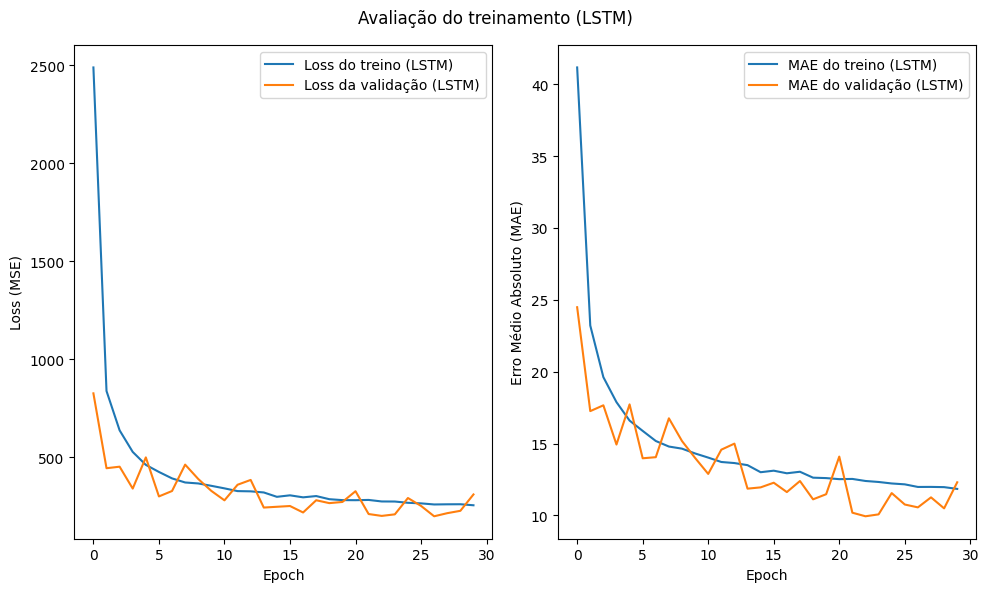

In [732]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [733]:
##Testando o modelo com os dados de teste 

In [734]:
rul_prev = model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


In [735]:
##Avaliando o modelo

317.84938883679825
17.83
0.1539092999410128
12.517611368163607
0.6790488388421542
Tempo de 421.343292s


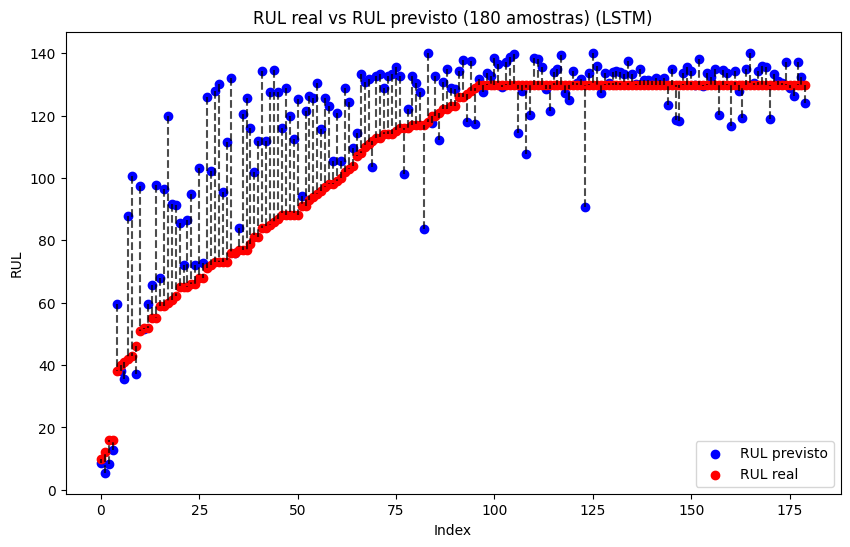

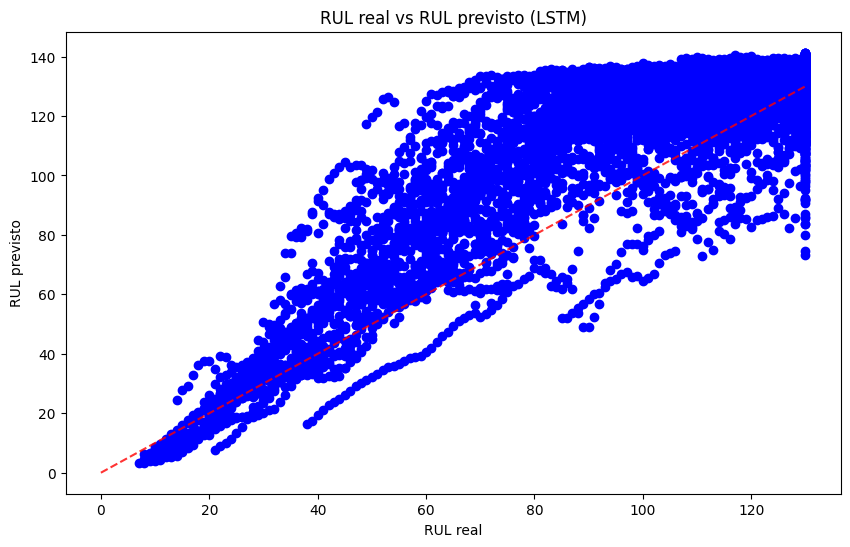

In [736]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [737]:
##Criando modelo BiLSTM

In [738]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(64,activation='tanh',input_shape=shape)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(64,activation='relu'))
model_bi.add(Dense(1,activation='linear'))

model_bi.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [739]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6145.4219 - mean_absolute_error: 66.7719 - mean_squared_error: 6145.4219

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 4294.4604 - mean_absolute_error: 55.0570 - mean_squared_error: 4294.4604 - val_loss: 2023.1664 - val_mean_absolute_error: 40.1104 - val_mean_squared_error: 2023.1661
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1856.0315 - mean_absolute_error: 38.0485 - mean_squared_error: 1856.0315

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1557.3337 - mean_absolute_error: 34.2647 - mean_squared_error: 1557.3337 - val_loss: 814.3716 - val_mean_absolute_error: 23.5766 - val_mean_squared_error: 814.3716
Epoch 3/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 852.4613 - mean_absolute_error: 23.6865 - mean_squared_error: 852.4613

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 796.7499 - mean_absolute_error: 22.7335 - mean_squared_error: 796.7499 - val_loss: 848.2801 - val_mean_absolute_error: 23.9327 - val_mean_squared_error: 848.2801
Epoch 4/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 704.9059 - mean_absolute_error: 21.1683 - mean_squared_error: 704.9059

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 673.1641 - mean_absolute_error: 20.6368 - mean_squared_error: 673.1641 - val_loss: 506.9469 - val_mean_absolute_error: 18.4599 - val_mean_squared_error: 506.9469
Epoch 5/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 632.3181 - mean_absolute_error: 19.7840 - mean_squared_error: 632.3181

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 607.3958 - mean_absolute_error: 19.4148 - mean_squared_error: 607.3958 - val_loss: 477.0152 - val_mean_absolute_error: 16.3810 - val_mean_squared_error: 477.0152
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 609.7145 - mean_absolute_error: 19.3538 - mean_squared_error: 609.7145

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 584.4038 - mean_absolute_error: 18.9222 - mean_squared_error: 584.4038 - val_loss: 421.3297 - val_mean_absolute_error: 16.3072 - val_mean_squared_error: 421.3297
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 538.9691 - mean_absolute_error: 18.2203 - mean_squared_error: 538.9691

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 544.1770 - mean_absolute_error: 18.2666 - mean_squared_error: 544.1770 - val_loss: 404.0878 - val_mean_absolute_error: 15.3704 - val_mean_squared_error: 404.0878
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 502.9048 - mean_absolute_error: 17.4699 - mean_squared_error: 502.9048

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 504.7374 - mean_absolute_error: 17.5391 - mean_squared_error: 504.7374 - val_loss: 390.1106 - val_mean_absolute_error: 14.6610 - val_mean_squared_error: 390.1106
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 497.6556 - mean_absolute_error: 17.2021 - mean_squared_error: 497.6556

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 492.0345 - mean_absolute_error: 17.1342 - mean_squared_error: 492.0345 - val_loss: 337.1560 - val_mean_absolute_error: 14.2437 - val_mean_squared_error: 337.1560
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 468.8081 - mean_absolute_error: 16.7672 - mean_squared_error: 468.8081

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 465.2908 - mean_absolute_error: 16.7298 - mean_squared_error: 465.2908 - val_loss: 371.5759 - val_mean_absolute_error: 14.4469 - val_mean_squared_error: 371.5759
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 439.5042 - mean_absolute_error: 16.2939 - mean_squared_error: 439.5042

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 439.4060 - mean_absolute_error: 16.2538 - mean_squared_error: 439.4060 - val_loss: 364.1909 - val_mean_absolute_error: 15.1072 - val_mean_squared_error: 364.1909
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 428.5019 - mean_absolute_error: 15.9448 - mean_squared_error: 428.5019

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 427.1070 - mean_absolute_error: 15.9050 - mean_squared_error: 427.1070 - val_loss: 313.4189 - val_mean_absolute_error: 12.8515 - val_mean_squared_error: 313.4189
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 398.2425 - mean_absolute_error: 15.3037 - mean_squared_error: 398.2425

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 407.5046 - mean_absolute_error: 15.5035 - mean_squared_error: 407.5046 - val_loss: 379.7414 - val_mean_absolute_error: 15.6893 - val_mean_squared_error: 379.7414
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 398.0862 - mean_absolute_error: 15.4218 - mean_squared_error: 398.0862

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 394.1738 - mean_absolute_error: 15.2670 - mean_squared_error: 394.1738 - val_loss: 258.9140 - val_mean_absolute_error: 12.6533 - val_mean_squared_error: 258.9141
Epoch 15/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 380.0339 - mean_absolute_error: 14.9966 - mean_squared_error: 380.0339

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 383.9520 - mean_absolute_error: 15.0757 - mean_squared_error: 383.9520 - val_loss: 248.5198 - val_mean_absolute_error: 12.2616 - val_mean_squared_error: 248.5198
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 359.0779 - mean_absolute_error: 14.5507 - mean_squared_error: 359.0779

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 368.8307 - mean_absolute_error: 14.7608 - mean_squared_error: 368.8307 - val_loss: 291.8534 - val_mean_absolute_error: 12.2750 - val_mean_squared_error: 291.8534
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 373.2068 - mean_absolute_error: 14.7938 - mean_squared_error: 373.2068

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 372.6966 - mean_absolute_error: 14.7873 - mean_squared_error: 372.6966 - val_loss: 224.4405 - val_mean_absolute_error: 11.4706 - val_mean_squared_error: 224.4405
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 365.1398 - mean_absolute_error: 14.6259 - mean_squared_error: 365.1399

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 364.4839 - mean_absolute_error: 14.6151 - mean_squared_error: 364.4839 - val_loss: 245.5956 - val_mean_absolute_error: 11.3652 - val_mean_squared_error: 245.5957
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 350.0263 - mean_absolute_error: 14.3095 - mean_squared_error: 350.0263

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 348.6716 - mean_absolute_error: 14.2792 - mean_squared_error: 348.6716 - val_loss: 398.9181 - val_mean_absolute_error: 15.4094 - val_mean_squared_error: 398.9181
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 354.7612 - mean_absolute_error: 14.3833 - mean_squared_error: 354.7613

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 350.7520 - mean_absolute_error: 14.2667 - mean_squared_error: 350.7521 - val_loss: 310.0701 - val_mean_absolute_error: 12.6176 - val_mean_squared_error: 310.0701
Epoch 21/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 343.6755 - mean_absolute_error: 14.0991 - mean_squared_error: 343.6755

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 338.4925 - mean_absolute_error: 14.0413 - mean_squared_error: 338.4925 - val_loss: 247.4960 - val_mean_absolute_error: 11.5432 - val_mean_squared_error: 247.4960
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 346.0439 - mean_absolute_error: 14.2071 - mean_squared_error: 346.0439

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 338.6527 - mean_absolute_error: 14.0627 - mean_squared_error: 338.6527 - val_loss: 284.6841 - val_mean_absolute_error: 13.1812 - val_mean_squared_error: 284.6841


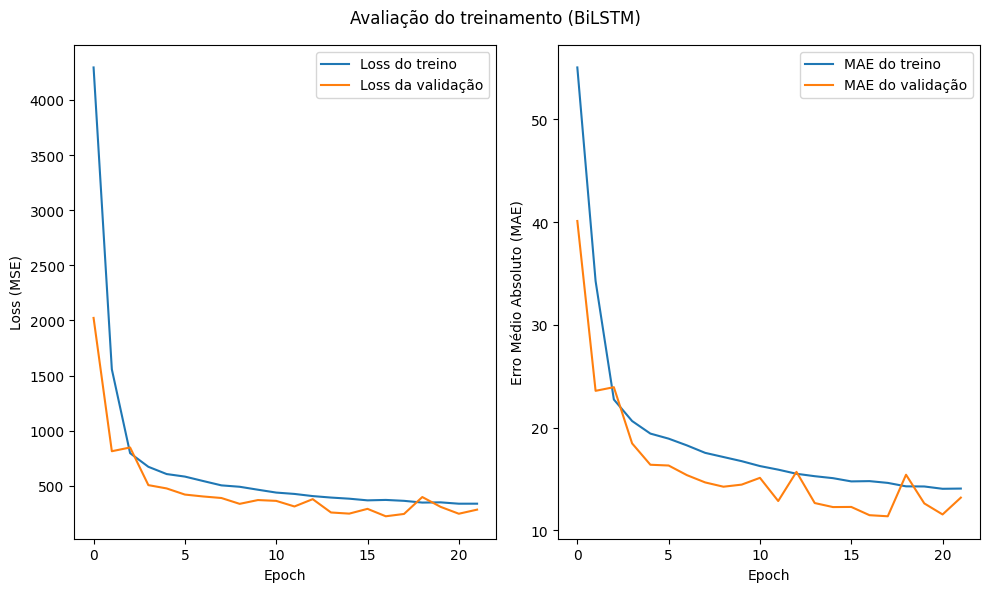

In [740]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [741]:
##Testando o modelo com os dados de teste

In [742]:
rul_prev = model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [743]:
##Avaliando o modelo

360.29971680966446
18.98
0.1739850455276863
15.45468519500023
0.636184254127101
Tempo de 97.557854s


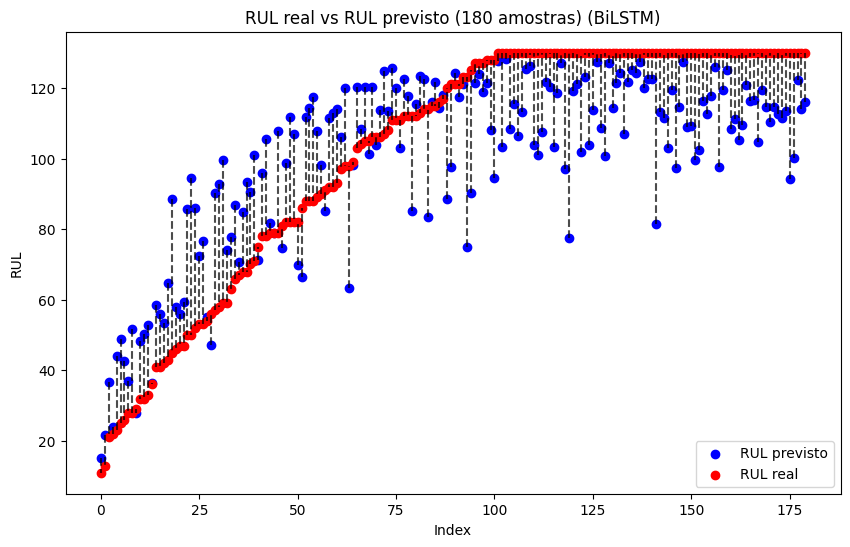

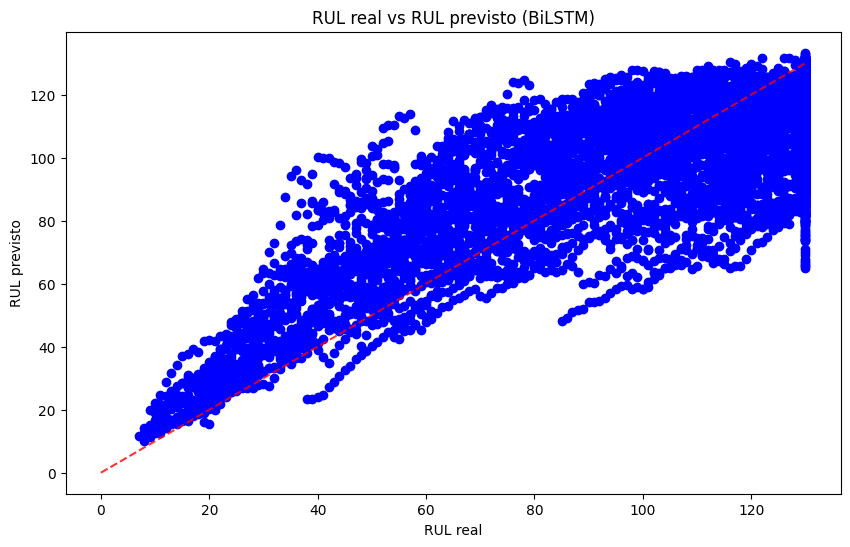

In [744]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()